# Covid-19 Greece Analytics

Author: [Marios Siganos](https://www.linkedin.com/in/msiganos)  
Email: marios.siganos@gmail.com

## Info

Source: https://covid19.gov.gr/covid19-live-analytics (https://covid19.innews.gr)

Available information on website:
- Cases: Current day, Total
- Tests: PCR, RPT, Total
- Deceased: Current day, Total
- Intubated
- Transfered out of ICU
- Hospitalized (Patient admissions)
- Discharged (Discharges due to healing)
- ICU percent (ICU beds coverage covid19)
- Beds percent (Bed coverage covid19)

Charts:
- Cases: Daily, 3 days average, 7 days average
- Deaths: Daily, 3 days average, 7 days average
- Intubated: Daily, 3 days average, 7 days average
- Age Distribution (0-17, 18-39, 40-64, 65+) of Cases: Cases, Deaths, Intubated
- Gender: Cases regarding women (percent), Cases regarding men (percent)

## Setup

**Import libraries**

In [1]:
import requests
import bs4
import re
import json
import pandas as pd
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt

In [2]:
pd.options.plotting.backend = "plotly"

## Collect and extract data

### Load webpage

Define webpage url

In [3]:
URL_PAGE_INNEWS = "https://covid19.innews.gr/"

Request web page

In [4]:
r = requests.get(URL_PAGE_INNEWS)

Load response to bs

In [5]:
soup = bs4.BeautifulSoup(r.text, 'html.parser')

Find script tag

In [6]:
script_tag = soup.find_all('script')[2]

**Detailed information available from script tag**:
- **daily_stats**: cases, total_cases, deceased, total_deceased, intubated, total_tests, total_rapid_tests, total_recovered, icu_out, hospitalized, discharged, icu_percent, beds_percent, positivity, fatality, positivity_variance, fatality_variance
- **weekly_stats**: cases, deceased, recovered, intubated
- **three_days_stats**: cases, deceased, recovered, intubated
- **last_stats**: cases, deceased, intubated, total_tests, total_cases, total_recovered, icu_out
- **total_stats**: category (cases, deceased, intubated), age group (0_17, 18_39, 40_64, 65plus), gender (male, female)

category/age group|0_17|18_39|40_64|65plus
-|-|-|-|-
cases|cases_0_17_male, cases_0_17_female|cases_18_39_male, cases_18_39_female|cases_40_64_male, cases_40_64_female|cases_65plus_male, cases_65plus_female
deceased|deceased_0_17_male, deceased_0_17_female|deceased_18_39_male, deceased_18_39_female|deceased_40_64_male, deceased_40_64_female|deceased_65plus_male, deceased_65plus_female
intubated|intubated_0_17_male, intubated_0_17_female|intubated_18_39_male, intubated_18_39_female|intubated_40_64_male, intubated_40_64_female|intubated_65plus_male, intubated_65plus_female

### Daily stats

Extract daily_stats

In [7]:
m = re.search("var daily_stats = (\[.*\])", script_tag.string)

In [8]:
daily_stats = json.loads(m.group(1))

In [9]:
print(f"Type: {type(daily_stats)} --> {type(daily_stats[0])}")
print(f"Keys: {list(daily_stats[0].keys())}")

Type: <class 'list'> --> <class 'dict'>
Keys: ['id', 'date', 'cases', 'deceased', 'total_deceased', 'created_at', 'updated_at', 'intubated', 'total_tests', 'total_rapid_tests', 'total_cases', 'total_recovered', 'icu_out', 'hospitalized', 'discharged', 'icu_percent', 'beds_percent', 'positivity', 'fatality', 'positivity_variance', 'fatality_variance']


Dataframe - df_daily_stats

In [10]:
df_daily_stats = pd.DataFrame.from_records(daily_stats)

In [11]:
df_daily_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   781 non-null    int64  
 1   date                 781 non-null    object 
 2   cases                781 non-null    int64  
 3   deceased             781 non-null    int64  
 4   total_deceased       781 non-null    int64  
 5   created_at           781 non-null    object 
 6   updated_at           781 non-null    object 
 7   intubated            781 non-null    int64  
 8   total_tests          781 non-null    int64  
 9   total_rapid_tests    781 non-null    int64  
 10  total_cases          781 non-null    int64  
 11  total_recovered      781 non-null    int64  
 12  icu_out              781 non-null    int64  
 13  hospitalized         712 non-null    float64
 14  discharged           713 non-null    float64
 15  icu_percent          713 non-null    flo

In [12]:
df_daily_stats.describe()

,id,cases,deceased,total_deceased,intubated,total_tests,total_rapid_tests,total_cases,total_recovered,icu_out,hospitalized,discharged,icu_percent,beds_percent
count,781.000000,781.000000,781.000000,781.000000,781.000000,7.810000e+02,7.810000e+02,7.810000e+02,781.000000,781.000000,712.000000,713.000000,713.000000,713.000000
mean,760.927017,4174.866837,36.275288,6172.658131,322.778489,4.265997e+06,1.226284e+07,5.751160e+05,32173.358515,1831.673496,162.030899,134.078541,37.164362,22.973478
std,230.419369,7049.609189,32.762858,9837.051151,244.799203,3.294021e+06,1.929600e+07,8.141023e+05,19721.012670,1545.129415,181.206510,157.617682,36.140031,23.743664
min,353.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+01,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,565.000000,259.000000,4.000000,0.000000,75.000000,1.112992e+06,0.000000e+00,1.303600e+04,3804.000000,170.000000,0.000000,0.000000,0.000000,0.000000
50%,762.000000,1534.000000,30.000000,0.000000,334.000000,4.093890e+06,2.224899e+06,2.494580e+05,45622.000000,1656.000000,104.500000,75.000000,40.190000,19.330000
75%,960.000000,3475.000000,62.000000,15069.000000,516.000000,6.730621e+06,1.494611e+07,6.733170e+05,45622.000000,3202.000000,293.000000,229.000000,70.820000,45.000000
max,1155.000000,50126.000000,134.000000,28808.000000,847.000000,1.090764e+07,6.768643e+07,3.266368e+06,45622.000000,4588.000000,654.000000,632.000000,99.850000,86.750000


positivity, fatality, positivity_variance and fatality_variance have only null values  
hospitalized, discharged, icu_percent and beds_percent have missing values

In [13]:
df_daily_stats.tail()

,id,date,cases,deceased,total_deceased,created_at,updated_at,intubated,total_tests,total_rapid_tests,...,total_recovered,icu_out,hospitalized,discharged,icu_percent,beds_percent,positivity,fatality,positivity_variance,fatality_variance
776,1151,2022-04-17,5673,50,28588,2022-04-17T14:29:12.000000Z,2022-04-18T13:10:56.000000Z,313,10853844,67082457,...,45622,4564,170.0,115.0,72.61,43.06,None,None,None,None
777,1152,2022-04-18,3868,63,28652,2022-04-18T13:10:45.000000Z,2022-04-19T14:32:46.000000Z,307,10860628,67130266,...,45622,4564,208.0,191.0,69.64,41.46,None,None,None,None
778,1153,2022-04-19,10005,46,28701,2022-04-19T14:33:48.000000Z,2022-04-20T13:00:07.000000Z,298,10880148,67366620,...,45622,4575,231.0,316.0,66.29,39.75,None,None,None,None
779,1154,2022-04-20,7365,64,28765,2022-04-20T13:00:56.000000Z,2022-04-20T13:00:56.000000Z,291,10894104,67536497,...,45622,4582,NaN,NaN,NaN,NaN,None,None,None,None
780,1155,2022-04-21,6755,43,28808,2022-04-21T13:16:39.000000Z,2022-04-21T13:16:39.000000Z,284,10907635,67686434,...,45622,4588,NaN,NaN,NaN,NaN,None,None,None,None


Last available data (hospitalized, discharged, icu_percent, beds_percent)

In [14]:
df_last_available = df_daily_stats[['date', 'hospitalized', 'discharged', 'icu_percent', 'beds_percent']].dropna()
df_last_available.tail(1)

,date,hospitalized,discharged,icu_percent,beds_percent
778,2022-04-19,231.0,316.0,66.29,39.75


### Weekly stats

Extract weekly_stats

In [15]:
m = re.search("var weekly_stats = (\[.*\])", script_tag.string)

In [16]:
weekly_stats = json.loads(m.group(1))

In [17]:
print(f"Type: {type(weekly_stats)} --> {type(weekly_stats[0])}")
print(f"Keys: {list(weekly_stats[0].keys())}")

Type: <class 'list'> --> <class 'dict'>
Keys: ['cases', 'deceased', 'recovered', 'intubated', 'date']


Dataframe - df_weekly_stats

In [18]:
df_weekly_stats = pd.DataFrame.from_records(weekly_stats)

In [19]:
df_weekly_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cases      781 non-null    int64 
 1   deceased   781 non-null    int64 
 2   recovered  781 non-null    int64 
 3   intubated  781 non-null    int64 
 4   date       781 non-null    object
dtypes: int64(4), object(1)
memory usage: 30.6+ KB


In [20]:
df_weekly_stats.describe()

,cases,deceased,recovered,intubated
count,781.000000,781.000000,781.0,781.000000
mean,4147.303457,35.649168,0.0,321.221511
std,6752.855677,31.924668,0.0,245.180971
min,0.000000,0.000000,0.0,0.000000
25%,244.000000,4.000000,0.0,72.000000
50%,1806.000000,30.000000,0.0,335.000000
75%,3120.000000,61.000000,0.0,517.000000
max,36220.000000,104.000000,0.0,835.000000


In [21]:
df_weekly_stats.tail()

,cases,deceased,recovered,intubated,date
776,9271,61,0,336,2022-04-17
777,8834,60,0,329,2022-04-18
778,8022,57,0,321,2022-04-19
779,7494,57,0,313,2022-04-20
780,7129,55,0,306,2022-04-21


### Three-day stats

Extract three_days_stats

In [22]:
m = re.search("var three_days_stats = (\[.*\])", script_tag.string)

In [23]:
three_days_stats = json.loads(m.group(1))

In [24]:
print(f"Type: {type(three_days_stats)} --> {type(three_days_stats[0])}")
print(f"Keys: {list(three_days_stats[0].keys())}")

Type: <class 'list'> --> <class 'dict'>
Keys: ['cases', 'deceased', 'recovered', 'intubated', 'date']


Dataframe - df_three_days_stats

In [25]:
df_three_days_stats = pd.DataFrame.from_records(three_days_stats)

In [26]:
df_three_days_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cases      781 non-null    int64 
 1   deceased   781 non-null    int64 
 2   recovered  781 non-null    int64 
 3   intubated  781 non-null    int64 
 4   date       781 non-null    object
dtypes: int64(4), object(1)
memory usage: 30.6+ KB


In [27]:
df_three_days_stats.describe()

,cases,deceased,recovered,intubated
count,781.000000,781.000000,781.0,781.000000
mean,4165.610755,35.887324,0.0,322.096031
std,6878.514535,32.133976,0.0,244.959263
min,0.000000,0.000000,0.0,0.000000
25%,263.000000,4.000000,0.0,74.000000
50%,1757.000000,30.000000,0.0,335.000000
75%,3329.000000,60.000000,0.0,518.000000
max,43252.000000,111.000000,0.0,845.000000


In [28]:
df_three_days_stats.tail()

,cases,deceased,recovered,intubated,date
776,7304,57,0,321,2022-04-17
777,5852,53,0,314,2022-04-18
778,6515,53,0,306,2022-04-19
779,7079,57,0,298,2022-04-20
780,8041,51,0,291,2022-04-21


### Last stats

Extract last_stats

In [29]:
m = re.search("var last_stats = (\{.*\})", script_tag.string)

In [30]:
last_stats = json.loads(m.group(1))

In [31]:
print(f"Type: {type(last_stats)}")
print(f"Keys: {list(last_stats.keys())}")

Type: <class 'dict'>
Keys: ['id', 'date', 'cases', 'deceased', 'total_deceased', 'created_at', 'updated_at', 'intubated', 'total_tests', 'total_rapid_tests', 'total_cases', 'total_recovered', 'icu_out', 'hospitalized', 'discharged', 'icu_percent', 'beds_percent', 'positivity', 'fatality', 'positivity_variance', 'fatality_variance']


Series - series_last_stats

In [32]:
series_last_stats = pd.Series(last_stats)

In [33]:
series_last_stats.info()

<class 'pandas.core.series.Series'>
Index: 21 entries, id to fatality_variance
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
13 non-null     object
dtypes: object(1)
memory usage: 336.0+ bytes


In [34]:
series_last_stats

id                                            1155
date                                    2022-04-21
cases                                         6755
deceased                                        43
total_deceased                               28808
created_at             2022-04-21T13:16:39.000000Z
updated_at             2022-04-21T13:16:39.000000Z
intubated                                      284
total_tests                               10907635
total_rapid_tests                         67686434
total_cases                                3266368
total_recovered                              45622
icu_out                                       4588
hospitalized                                  None
discharged                                    None
icu_percent                                   None
beds_percent                                  None
positivity                                    None
fatality                                      None
positivity_variance            

Check if the last record of df_daily_stats is equal to the series_last_stats

In [35]:
df_daily_stats.iloc[-1].equals(series_last_stats)

True

In [36]:
pd.concat([df_daily_stats.iloc[-1], series_last_stats, df_daily_stats.iloc[-1] == series_last_stats], axis=1, keys=['df_daily','last_stats','equal'])

,df_daily,last_stats,equal
id,1155,1155,True
date,2022-04-21,2022-04-21,True
cases,6755,6755,True
deceased,43,43,True
total_deceased,28808,28808,True
created_at,2022-04-21T13:16:39.000000Z,2022-04-21T13:16:39.000000Z,True
updated_at,2022-04-21T13:16:39.000000Z,2022-04-21T13:16:39.000000Z,True
intubated,284,284,True
total_tests,10907635,10907635,True
total_rapid_tests,67686434,67686434,True


### Total stats

Extract total_stats

In [37]:
m = re.search("var total_stats = (\{.*\})", script_tag.string)

In [38]:
total_stats = json.loads(m.group(1))

In [39]:
print(f"Type: {type(total_stats)}")
print(f"Keys: {list(total_stats.keys())}")

Type: <class 'dict'>
Keys: ['id', 'date', 'cases_0_17_male', 'cases_0_17_female', 'cases_18_39_male', 'cases_18_39_female', 'cases_40_64_male', 'cases_40_64_female', 'cases_65plus_male', 'cases_65plus_female', 'deceased_0_17_male', 'deceased_0_17_female', 'deceased_18_39_male', 'deceased_18_39_female', 'deceased_40_64_male', 'deceased_40_64_female', 'deceased_65plus_male', 'deceased_65plus_female', 'created_at', 'updated_at', 'intubated_0_17_male', 'intubated_0_17_female', 'intubated_18_39_male', 'intubated_18_39_female', 'intubated_40_64_male', 'intubated_40_64_female', 'intubated_65plus_male', 'intubated_65plus_female']


Series - total_stats

In [40]:
series_total_stats = pd.Series(total_stats)

In [41]:
series_total_stats.info()

<class 'pandas.core.series.Series'>
Index: 28 entries, id to intubated_65plus_female
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
28 non-null     object
dtypes: object(1)
memory usage: 448.0+ bytes


In [42]:
series_total_stats

id                                                 116
date                                        2022-04-13
cases_0_17_male                                 393582
cases_0_17_female                               370001
cases_18_39_male                                533852
cases_18_39_female                              559715
cases_40_64_male                                533340
cases_40_64_female                              588869
cases_65plus_male                               166182
cases_65plus_female                             176348
deceased_0_17_male                                   3
deceased_0_17_female                                 4
deceased_18_39_male                                155
deceased_18_39_female                               52
deceased_40_64_male                               2903
deceased_40_64_female                             1504
deceased_65plus_male                             12499
deceased_65plus_female                           11224
created_at

### Export raw data

Uncomment to save raw files

In [163]:
# df_daily_stats.to_csv('data/daily_stats-raw.csv', index=False)

In [164]:
# df_three_days_stats.to_csv('data/three_day_stats-raw.csv', index=False)

In [165]:
# df_weekly_stats.to_csv('data/weekly_stats-raw.csv', index=False)

In [166]:
# series_total_stats.to_csv('data/total_stats-raw.csv', index=True)

## Analysis and calculations

### Daily stats

Calculate cummulative sums

In [47]:
df_daily_stats['calculated_cases_cumsum'] = df_daily_stats['cases'].cumsum()

In [48]:
df_daily_stats['calculated_deceased_cumsum'] = df_daily_stats['deceased'].cumsum()

In [49]:
df_daily_stats['calculated_intubated_cumsum'] = df_daily_stats['intubated'].cumsum()

Explore any difference between given column "total_cases" and calculated cases cumsum

In [50]:
df_total_cases_diff = df_daily_stats['total_cases'].diff()
df_total_cases_diff.iloc[0] = df_daily_stats['total_cases'].iloc[0]
df_total_cases_diff = df_total_cases_diff.astype('int')

In [51]:
df_total_cases_diff

0          1
1          2
2          1
3          1
4          2
       ...  
776     5673
777     3868
778    10211
779     7365
780     6755
Name: total_cases, Length: 781, dtype: int64

Add calculated calculated_total_cases_diff to df_daily_stats

In [52]:
df_daily_stats['calculated_total_cases_diff'] = df_total_cases_diff.astype('int')

Check if the sum of 'cases' is equal to the last record of 'calculated_cases_cumsum'

In [53]:
df_daily_stats['cases'].sum() == df_daily_stats['calculated_cases_cumsum'].iloc[-1]

True

Check if the sum of 'deceased' is equal to the last record of 'calculated_deceased_cumsum'

In [54]:
df_daily_stats['deceased'].sum() == df_daily_stats['calculated_deceased_cumsum'].iloc[-1]

True

Check if 'total_cases' values match 'calculated_cases_cumsum' values

In [55]:
(df_daily_stats['total_cases'] == df_daily_stats['calculated_cases_cumsum']).all()

False

Check if 'total_deceased' values match 'calculated_deceased_cumsum' values

In [56]:
(df_daily_stats['total_deceased'] == df_daily_stats['calculated_deceased_cumsum']).all()

False

Check if 'cases' values match 'calculated_total_cases_diff' values

In [57]:
(df_daily_stats['calculated_total_cases_diff'] == df_daily_stats['cases']).all()

False

**There are differences between given column "total_cases" and calculated cummulative sum (cases_cumsum) !!!**

In [58]:
df_daily_stats[df_daily_stats['cases'] != df_daily_stats['calculated_total_cases_diff']][['date','cases','calculated_total_cases_diff','total_cases','calculated_cases_cumsum']]

,date,cases,calculated_total_cases_diff,total_cases,calculated_cases_cumsum
45,2020-04-11,72,70,2081,2083
49,2020-04-15,22,12,2182,2194
50,2020-04-16,15,25,2207,2209
86,2020-05-22,21,20,2873,2876
91,2020-05-27,18,11,2903,2913
...,...,...,...,...,...
763,2022-04-04,18425,18424,3096135,3086874
764,2022-04-05,18988,18456,3114591,3105862
765,2022-04-06,15044,12265,3126856,3120906
771,2022-04-12,15690,15331,3195887,3190296


### Total stats

Create dataframe from series

In [59]:
df_total_stats = pd.DataFrame(series_total_stats)
df_total_stats.rename(columns={0: 'value'}, inplace=True)
df_total_stats.drop(['id','date','created_at', 'updated_at'], inplace=True)

Split category_agefrom_ageto_gender (e.g. cases_0_17_male) to category, age, and gender columns (cases, 0_17, male)

In [60]:
df_total_stats.reset_index(inplace=True)
df_total_stats['category'] = df_total_stats.apply(lambda row: row['index'].split('_')[0], axis=1)
df_total_stats['age'] = df_total_stats.apply(lambda row: '_'.join(row['index'].split('_')[1:-1]), axis=1)
df_total_stats['gender'] = df_total_stats.apply(lambda row: row['index'].split('_')[-1], axis=1)
df_total_stats.set_index('index', inplace=True)
df_total_stats['value'] = df_total_stats['value'].astype(int)
df_total_stats

,value,category,age,gender
index,,,,
cases_0_17_male,393582,cases,0_17,male
cases_0_17_female,370001,cases,0_17,female
cases_18_39_male,533852,cases,18_39,male
cases_18_39_female,559715,cases,18_39,female
cases_40_64_male,533340,cases,40_64,male
cases_40_64_female,588869,cases,40_64,female
cases_65plus_male,166182,cases,65plus,male
cases_65plus_female,176348,cases,65plus,female
deceased_0_17_male,3,deceased,0_17,male


Total stats per gender (male, female)

In [61]:
df_total_stats.groupby(['category','gender'])[['value']].sum()

value
category  gender         
cases     female  1694933
          male    1626956
deceased  female    12784
          male      15560
intubated female      120
          male        225

Gender labels

In [62]:
gender_labels = df_total_stats['gender'].unique().tolist()
gender_labels

['male', 'female']

Total stats per category (cases, deceased, intubated)

In [63]:
df_total_stats_category = df_total_stats.groupby('category')[['value']].sum()
df_total_stats_category

,value
category,
cases,3321889
deceased,28344
intubated,345


Compate daily stats (same as last stats) with total stats

In [64]:
print( f"Total stats: {series_total_stats['date']}" )
print( f"Daily stats: {df_daily_stats.iloc[-1]['date']}" )
print( f"Last stats: {series_last_stats['date']}" )

Total stats: 2022-04-13
Daily stats: 2022-04-21
Last stats: 2022-04-21


In [65]:
pd.DataFrame({
    'total_stats': df_total_stats_category.loc[['cases', 'deceased']]['value'],
    'daily_stats': df_daily_stats.iloc[-1][['total_cases', 'total_deceased']].rename({'total_cases': 'cases', 'total_deceased': 'deceased'})
})

,total_stats,daily_stats
cases,3321889,3266368
deceased,28344,28808


Category labels

In [66]:
category_labels = df_total_stats['category'].unique().tolist()
category_labels

['cases', 'deceased', 'intubated']

Total stats per age group (0_17, 18_39, 40_64, 65plus)

In [67]:
df_total_stats.groupby(['category', 'age'])[['value']].sum()

value
category  age            
cases     0_17     763583
          18_39   1093567
          40_64   1122209
          65plus   342530
deceased  0_17          7
          18_39       207
          40_64      4407
          65plus    23723
intubated 0_17          0
          18_39         9
          40_64       101
          65plus      235

Age group labels

In [68]:
age_labels = np.char.replace( df_total_stats['age'].unique().astype(np.str_), '_', ' to ')
age_labels = np.char.replace( age_labels, 'plus', '+').tolist()
age_labels

['0 to 17', '18 to 39', '40 to 64', '65+']

Function - Get gender values by category

In [69]:
get_gender_values_by_category = lambda cat: df_total_stats.groupby(['category', 'gender'])[['value']].sum().loc[cat,'value'].to_list()

Example: Get gender values for 'cases'

In [70]:
get_gender_values_by_category('cases')

[1694933, 1626956]

Function - Get age group values by category

In [71]:
get_age_group_values_by_category = lambda cat: df_total_stats.groupby(['category', 'age'])[['value']].sum().loc[cat,'value'].to_list()

Example: Get age group values for 'cases'

In [72]:
get_age_group_values_by_category('cases')

[763583, 1093567, 1122209, 342530]

Function - Get age group values by category and gender

In [73]:
get_age_group_values_by_category_and_gender = lambda cat,gender: df_total_stats.groupby(['category','gender','age'])[['value']].sum().loc[cat,gender]['value']

Example: Get age group values for 'cases' and 'male'

In [74]:
get_age_group_values_by_category_and_gender('cases','male')

age
0_17      393582
18_39     533852
40_64     533340
65plus    166182
Name: value, dtype: int64

Function - Get values for specific category

In [75]:
get_values_for_category = lambda cat: df_total_stats[df_total_stats['category']==cat].copy()

Total stats grouped by category, age and gender

In [76]:
df_total_stats.groupby(['category', 'age', 'gender'])[['value']].sum()

value
category  age    gender        
cases     0_17   female  370001
                 male    393582
          18_39  female  559715
                 male    533852
          40_64  female  588869
                 male    533340
          65plus female  176348
                 male    166182
deceased  0_17   female       4
                 male         3
          18_39  female      52
                 male       155
          40_64  female    1504
                 male      2903
          65plus female   11224
                 male     12499
intubated 0_17   female       0
                 male         0
          18_39  female       4
                 male         5
          40_64  female      35
                 male        66
          65plus female      81
                 male       154

Total stats grouped by category and age with gender as columns and sub totals (pivot table)

In [77]:
pivot = pd.pivot_table(df_total_stats, values=['value'], index=['category', 'age'], columns=['gender'], aggfunc=np.sum)

In [78]:
pivot[('value', 'total')] = pivot[('value', 'female')] + pivot[('value', 'male')]

In [79]:
df_category_sum = pivot.groupby('category').sum()

pivot.loc[('cases', 'total'),:] = df_category_sum.loc['cases', 'value'].values
pivot.loc[('deceased', 'total'),:] = df_category_sum.loc['deceased', 'value'].values
pivot.loc[('intubated', 'total'),:] = df_category_sum.loc['intubated', 'value'].values

In [80]:
pivot.sort_index(inplace=True)

In [81]:
pivot = pivot.astype("int")

In [82]:
pivot.style.format(thousands=',')

### Positivity rate (Percent Positive)

Positivity rate (Percent positive / Percent positive rate) is the percentage of all tests performed that are actually positive.

$\text{Positivity rate in %} = \frac{ \text{cases} }{ \text{total tests} } \times 100$

Total tests

In [83]:
total_tests = series_last_stats['total_tests'] + series_last_stats['total_rapid_tests']
total_tests

78594069

Today PCR tests

In [84]:
today_pcr_tests = df_daily_stats.iloc[-2:]['total_tests'].diff().iloc[-1].astype(int)
today_pcr_tests

13531

Today rapid tests

In [85]:
today_rapid_tests = df_daily_stats.iloc[-2:]['total_rapid_tests'].diff().iloc[-1].astype(int)
today_rapid_tests

149937

Today tests

In [86]:
today_tests = today_pcr_tests + today_rapid_tests
today_tests

163468

Today cases

In [87]:
today_cases = df_daily_stats['cases'].iloc[-1]
today_cases

6755

Today positivity rate

In [88]:
today_positivity = today_cases / today_tests * 100
today_positivity

4.132307240560844

Daily PCR tests

In [89]:
series_tests_pcr = df_daily_stats['total_tests'].diff()
series_tests_pcr[0] = df_daily_stats['total_tests'].iloc[0]
series_tests_pcr = series_tests_pcr.astype(int)
series_tests_pcr

0         25
1         45
2         70
3         80
4         70
       ...  
776     8925
777     6784
778    19520
779    13956
780    13531
Name: total_tests, Length: 781, dtype: int64

Check if there are negative differences

In [90]:
series_tests_pcr[series_tests_pcr<0]

102   -3648
Name: total_tests, dtype: int64

Set daily PCR tests value equal to the previous day where there are negative differences

In [91]:
series_tests_pcr[series_tests_pcr<0] = np.nan
series_tests_pcr.ffill(inplace=True)
series_tests_pcr[series_tests_pcr.isna()]

Series([], Name: total_tests, dtype: float64)

Daily rapid tests

In [92]:
series_tests_rapid = df_daily_stats['total_rapid_tests'].diff()
series_tests_rapid[0] = df_daily_stats['total_rapid_tests'].iloc[0]
series_tests_rapid = series_tests_rapid.astype(int)
series_tests_rapid

0           0
1           0
2           0
3           0
4           0
        ...  
776    115263
777     47809
778    236354
779    169877
780    149937
Name: total_rapid_tests, Length: 781, dtype: int64

Check if there are negative differences

In [93]:
series_tests_rapid[series_tests_rapid<0]

292   -398830
298   -482598
306   -579462
308   -595064
Name: total_rapid_tests, dtype: int64

Set daily rapid tests value equal to the previous day where there are negative differences

In [94]:
series_tests_rapid[series_tests_rapid<0] = np.nan
series_tests_rapid.ffill(inplace=True)
series_tests_rapid[series_tests_rapid.isna()]

Series([], Name: total_rapid_tests, dtype: float64)

Add calculated daily tests (PCR, rapid, total) to df_daily_stats

In [95]:
df_daily_stats['calculated_tests_pcr'] = series_tests_pcr.astype(int)

In [96]:
df_daily_stats['calculated_tests_rapid'] = series_tests_rapid.astype(int)

In [97]:
df_daily_stats['calculated_tests_total'] = df_daily_stats['calculated_tests_pcr'] + df_daily_stats['calculated_tests_rapid']

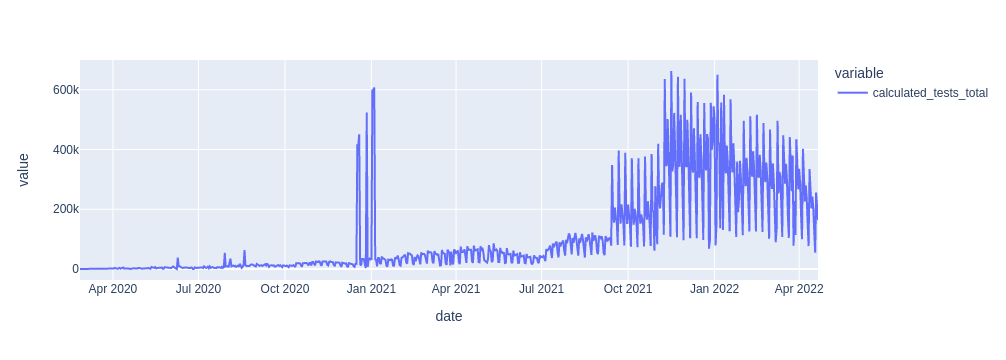

In [162]:
df_daily_stats.set_index('date')[['calculated_tests_total']].plot()

Daily positivity rate

In [99]:
series_positivity = df_daily_stats['cases'] / df_daily_stats['calculated_tests_total'] * 100
series_positivity

0      4.000000
1      4.444444
2      1.428571
3      1.250000
4      2.857143
         ...   
776    4.568074
777    7.085157
778    3.910128
779    4.006354
780    4.132307
Length: 781, dtype: float64

Add calculated daily positivity rate to df_daily_stats

In [100]:
df_daily_stats['calculated_positivity'] = series_positivity

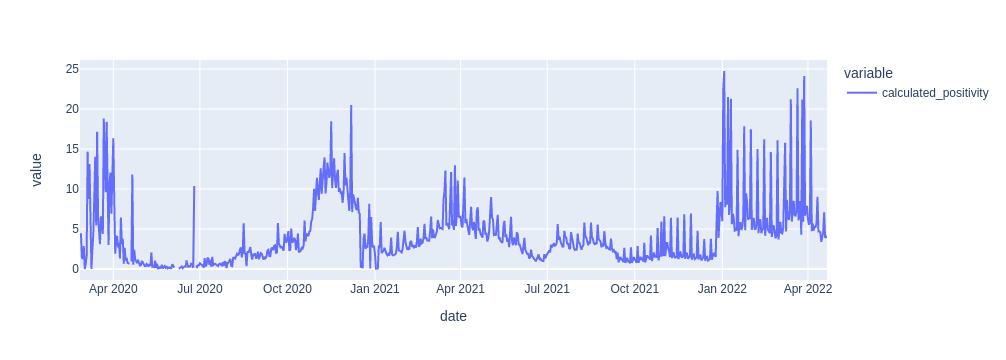

In [152]:
df_daily_stats.set_index('date')['calculated_positivity'].plot()

### Fatality rate

Case fatality rate (CFR) is the proportion of people diagnosed with the disease, who end up dying of it.

$\text{Fatality rate in %} = \frac{ \text{deaths} }{ \text{confirmed cases} } \times 100$

Today fatality rate

Using 'total_deceased' and 'total_cases' from df_daily_stats

In [102]:
df_daily_stats.iloc[-1]['total_deceased'] / df_daily_stats.iloc[-1]['total_cases'] * 100

0.8819581871975233

Using 'calculated_deceased_cumsum' and 'calculated_cases_cumsum' from df_daily_stats

In [103]:
df_daily_stats.iloc[-1]['calculated_deceased_cumsum'] / df_daily_stats.iloc[-1]['calculated_cases_cumsum'] * 100

0.8688968895325389

Using 'deceased' and 'cases' from df_total_stats

In [104]:
df_total_stats[df_total_stats['category']=='deceased']['value'].sum() / df_total_stats[df_total_stats['category']=='cases']['value'].sum() * 100

0.8532494613757413

Fatality rate by age group

In [105]:
series_deceased_by_age = df_total_stats[df_total_stats['category']=='deceased'].groupby('age')['value'].sum()
series_cases_by_age = df_total_stats[df_total_stats['category']=='cases'].groupby('age')['value'].sum()
series_fatality_by_age = series_deceased_by_age / series_cases_by_age * 100
series_fatality_by_age

age
0_17      0.000917
18_39     0.018929
40_64     0.392708
65plus    6.925817
Name: value, dtype: float64

Fatality rate by gender

In [106]:
series_deceased_by_gender = df_total_stats[df_total_stats['category']=='deceased'].groupby('gender')['value'].sum()
series_cases_by_gender = df_total_stats[df_total_stats['category']=='cases'].groupby('gender')['value'].sum()
series_fatality_by_gender = series_deceased_by_gender / series_cases_by_gender * 100
series_fatality_by_gender

gender
female    0.754248
male      0.956387
Name: value, dtype: float64

In [107]:
series_deceased_by_age_and_gender = df_total_stats[df_total_stats['category']=='deceased'].groupby(['age', 'gender'])['value'].sum()
series_cases_by_age_and_gender = df_total_stats[df_total_stats['category']=='cases'].groupby(['age', 'gender'])['value'].sum()
series_fatality_by_age_and_gender = series_deceased_by_age_and_gender / series_cases_by_age_and_gender * 100
series_fatality_by_age_and_gender

age     gender
0_17    female    0.001081
        male      0.000762
18_39   female    0.009290
        male      0.029034
40_64   female    0.255405
        male      0.544306
65plus  female    6.364688
        male      7.521272
Name: value, dtype: float64

Daily fatality rate

Using 'total_deceased' and 'total_cases' from df_daily_stats

In [108]:
series_fatality = df_daily_stats['total_deceased'] / df_daily_stats['total_cases'] * 100
series_fatality

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
776    0.882845
777    0.883765
778    0.882497
779    0.882467
780    0.881958
Length: 781, dtype: float64

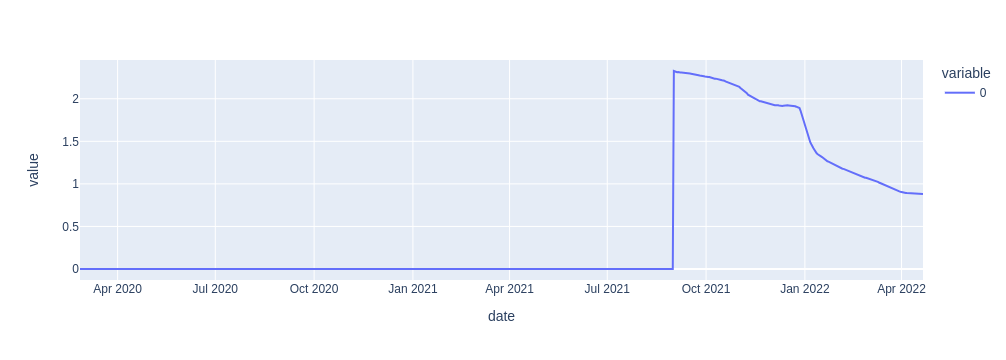

In [109]:
series_fatality.index = df_daily_stats['date']
series_fatality.plot()

There are missing values (0) in 'total_deceased' from df_daily_stats

Using 'calculated_deceased_cumsum' and 'calculated_cases_cumsum' from df_daily_stats

In [110]:
series_fatality = df_daily_stats['calculated_deceased_cumsum'] / df_daily_stats['calculated_cases_cumsum'] * 100
series_fatality

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
776    0.869739
777    0.870646
778    0.869380
779    0.869379
780    0.868897
Length: 781, dtype: float64

Add calculated daily fatality rate to df_daily_stats

In [111]:
df_daily_stats['calculated_fatality'] = series_fatality

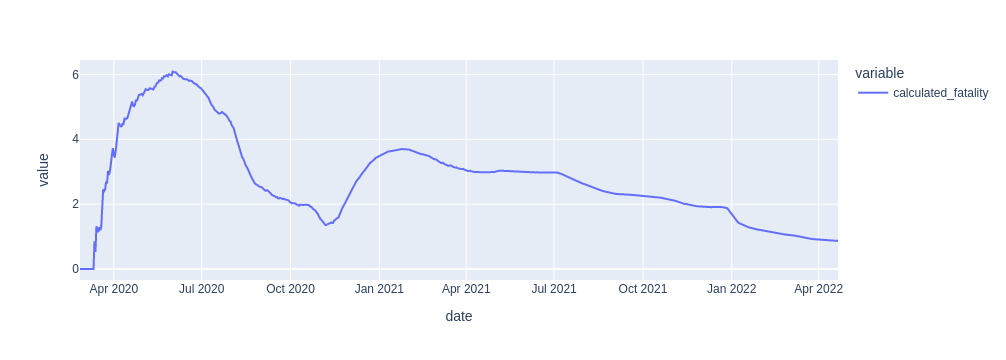

In [112]:
df_daily_stats.set_index('date')['calculated_fatality'].plot()

### Groups by date (day, month, year)

In [113]:
df = df_daily_stats.copy()

In [114]:
df['date'] = pd.to_datetime(df['date'])

In [115]:
df['calculated_date_day'] = df['date'].dt.day_name()

In [116]:
df['calculated_date_month'] = df['date'].dt.month_name()

In [117]:
df['calculated_date_year'] = df['date'].dt.year

In [118]:
days_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [119]:
months_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

Total cases, deceased and tests per day of week

In [120]:
df_group_day = df.groupby('calculated_date_day')[['cases', 'deceased', 'calculated_tests_total']].sum().reindex(days_list)
df_group_day['positivity'] = df_group_day['cases'] / df_group_day['calculated_tests_total'] * 100
df_group_day['fatality'] = df_group_day['deceased'] / df_group_day['cases'] * 100
df_group_day.style.format(thousands=",", precision=2).background_gradient(cmap='Blues')

,cases,deceased,calculated_tests_total,positivity,fatality
calculated_date_day,,,,,
Monday,"441,777","4,411","4,906,391",9.00,1.00
Tuesday,"590,759","4,156","17,904,074",3.30,0.70
Wednesday,"520,279","4,111","12,082,509",4.31,0.79
Thursday,"500,958","4,096","11,556,321",4.33,0.82
Friday,"489,358","4,077","13,772,354",3.55,0.83
Saturday,"439,531","3,693","13,107,275",3.35,0.84
Sunday,"277,909","3,787","8,364,446",3.32,1.36


Mean cases, deceased and tests per day of week

In [121]:
df_group_day_mean = df.groupby('calculated_date_day')[['cases', 'deceased', 'calculated_tests_total']].mean().reindex(days_list)
df_group_day_mean.style.format("{:,.0f}").background_gradient(cmap='Blues')

,cases,deceased,calculated_tests_total
calculated_date_day,,,
Monday,"3,944",39,"43,807"
Tuesday,"5,275",37,"159,858"
Wednesday,"4,645",37,"107,880"
Thursday,"4,433",36,"102,268"
Friday,"4,409",37,"124,075"
Saturday,"3,960",33,"118,084"
Sunday,"2,526",34,"76,040"


Total cases, deceased and tests per month

In [122]:
df_group_month = df.groupby('calculated_date_month')[['cases', 'deceased', 'calculated_tests_total']].sum().reindex(months_list)
df_group_month['positivity'] = df_group_month['cases'] / df_group_month['calculated_tests_total'] * 100
df_group_month['fatality'] = df_group_month['deceased'] / df_group_month['cases'] * 100
df_group_month.style.format(thousands=",", precision=2).background_gradient(cmap='Blues')

,cases,deceased,calculated_tests_total,positivity,fatality
calculated_date_month,,,,,
January,"747,231","3,603","12,285,100",6.08,0.48
February,"513,497","2,979","9,642,425",5.33,0.58
March,"683,018","3,258","9,835,911",6.94,0.48
April,"322,346","3,629","6,198,471",5.20,1.13
May,"57,578","1,749","1,489,753",3.86,3.04
June,"20,851",609,"1,257,124",1.66,2.92
July,"68,971",267,"2,388,808",2.89,0.39
August,"98,534",742,"3,135,302",3.14,0.75
September,"74,003","1,204","4,976,818",1.49,1.63


Mean cases, deceased and tests per month

In [123]:
df_group_month_mean = df.groupby('calculated_date_month')[['cases', 'deceased', 'calculated_tests_total']].mean().reindex(months_list)
df_group_month_mean.style.format("{:,.0f}").background_gradient(cmap='Blues')

,cases,deceased,calculated_tests_total
calculated_date_month,,,
January,"12,052",58,"198,147"
February,"8,558",50,"160,707"
March,"7,344",35,"105,762"
April,"3,980",45,"76,524"
May,944,29,"24,422"
June,372,11,"22,449"
July,"1,112",4,"38,529"
August,"1,589",12,"50,569"
September,"1,233",20,"82,947"


Total cases, deceased and tests per year

In [124]:
df_group_year = df.groupby('calculated_date_year')[['cases', 'deceased', 'calculated_tests_total']].sum()
df_group_year['positivity'] = df_group_year['cases'] / df_group_year['calculated_tests_total'] * 100
df_group_year['fatality'] = df_group_year['deceased'] / df_group_year['cases'] * 100
df_group_year.style.format(thousands=",", precision=2).background_gradient(cmap='Blues')

,cases,deceased,calculated_tests_total,positivity,fatality
calculated_date_year,,,,,
2020,"139,473","4,838","4,693,848",2.97,3.47
2021,"1,065,077","15,707","45,654,398",2.33,1.47
2022,"2,056,021","7,786","31,345,124",6.56,0.38


Total cases, deceased and tests per year and month

In [125]:
df_group_year_month = df.groupby(['calculated_date_month', 'calculated_date_year',])[['cases', 'deceased', 'calculated_tests_total']].sum().reindex(months_list, level=0)
df_group_year_month['positivity'] = df_group_year_month['cases'] / df_group_year_month['calculated_tests_total'] * 100
df_group_year_month['fatality'] = df_group_year_month['deceased'] / df_group_year_month['cases'] * 100
df_group_year_month.style.format(thousands=",", precision=2).background_gradient(cmap='Blues')\
                                                            .highlight_min(props='color: red')\
                                                            .highlight_max(props='border: 1px solid red')

Total cases, deceased and tests per month and year

In [126]:
df_group_month_year = df.groupby(['calculated_date_year', 'calculated_date_month'])[['cases', 'deceased', 'calculated_tests_total']].sum().reindex(months_list, level=1)
df_group_month_year['positivity'] = df_group_month_year['cases'] / df_group_month_year['calculated_tests_total'] * 100
df_group_month_year['fatality'] = df_group_month_year['deceased'] / df_group_month_year['cases'] * 100
df_group_month_year.style.format(thousands=",", precision=2).background_gradient(cmap='Blues')\
                                                            .highlight_min(props='color: red')\
                                                            .highlight_max(props='border: 1px solid red')

## Data visualizations - Plotly

In [127]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

### Gender

#### Cases

Pie chart

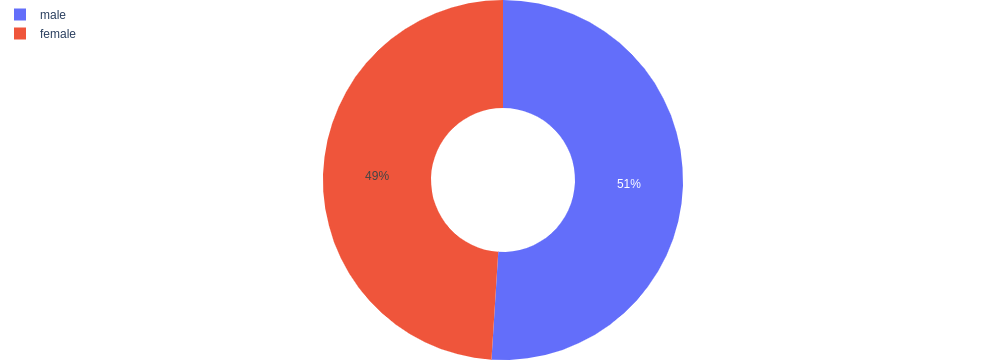

In [128]:
figure=go.Figure(
    data=[
        go.Pie(
            labels=gender_labels,
            values=get_gender_values_by_category('cases'),
            hole=0.4
        )
    ],
    layout={
        'margin': {'l': 0, 'b': 0, 't': 0, 'r': 0},
        'legend': {'x': 0, 'y': 1, 'orientation': 'v'},
    }
)
figure.show()

#### Deceased

Pie chart

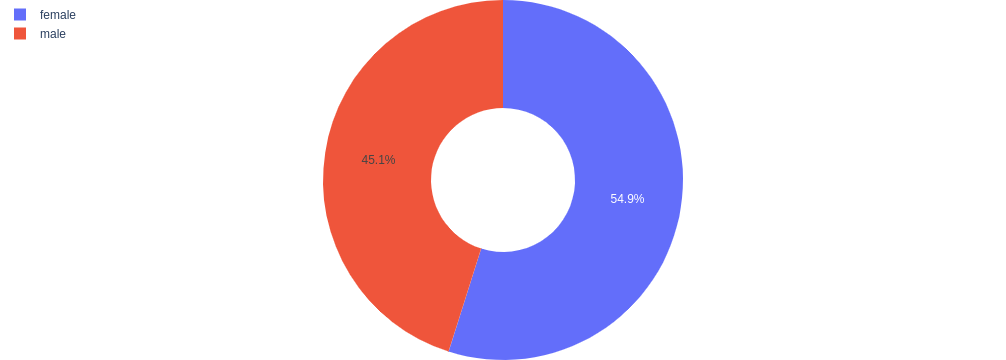

In [129]:
figure = go.Figure(
    data=[
        go.Pie(
            labels=gender_labels,
            values=get_gender_values_by_category('deceased'),
            hole=0.4,
            name = "",
        )
    ],
    layout={
        'margin': {'l': 0, 'b': 0, 't': 0, 'r': 0},
        'legend': {'x': 0, 'y': 1, 'orientation': 'v'},
    }
)

figure.update_traces(
    hovertext = [f'Fatality: {val:.3f} %' for val in series_fatality_by_gender.to_list()],
    hovertemplate = "%{label}<br>%{value}<br>%{text}<br>"
)

figure.show()

#### Intubated

Pie chart

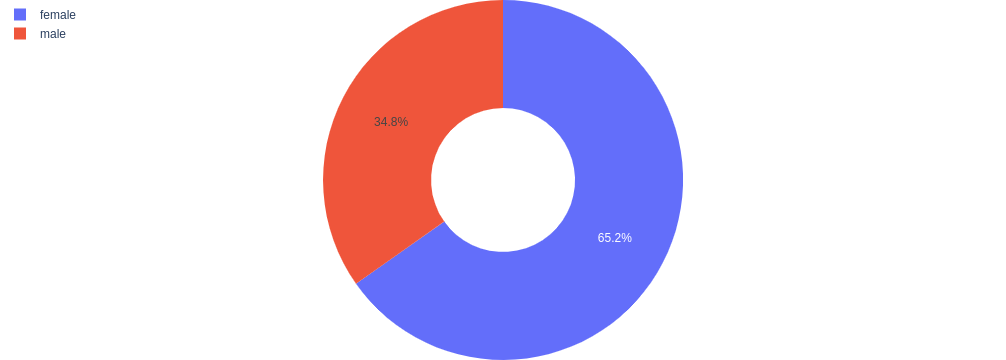

In [130]:
figure=go.Figure(
    data=[
        go.Pie(
            labels=gender_labels,
            values=get_gender_values_by_category('intubated'),
            hole=0.4
        )
    ],
    layout={
        'margin': {'l': 0, 'b': 0, 't': 0, 'r': 0},
        'legend': {'x': 0, 'y': 1, 'orientation': 'v'},
    }
)
figure.show()

#### Combined

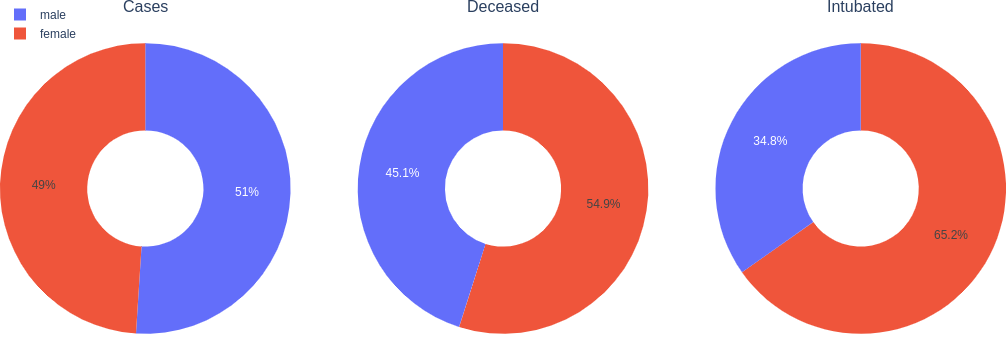

In [131]:
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
    subplot_titles=("Cases", "Deceased", "Intubated")
)

categories = ['cases', 'deceased', 'intubated']

for i,cat in enumerate(categories):
    fig.add_trace(
            go.Pie(
                labels=gender_labels,
                values=get_gender_values_by_category(cat),
                name=cat.capitalize(),
                hole=0.4,
            ),
        row=1, col=i+1
    )

fig.update_layout(
    margin = {'l': 0, 'b': 0, 't': 0, 'r': 0},
    legend = {'x': 0, 'y': 1.05, 'orientation': 'v'}
)

fig.show()

### Age groups

Stats by age group - Bar chart (grouped)

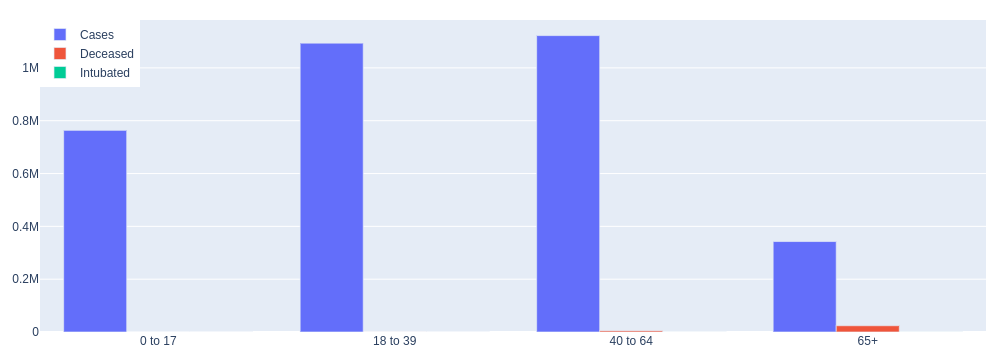

In [132]:
fig = go.Figure()

categories = ['cases', 'deceased', 'intubated']

for cat in categories:
    fig.add_trace(go.Bar(
        x=age_labels,
        y=get_age_group_values_by_category(cat),
        name=cat.capitalize(),
    ))

fig.update_layout({
    'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
    'legend': {'x': 0, 'y': 1.0},
    'yaxis': {'fixedrange': True, 'hoverformat': ','},
    'xaxis': {'fixedrange': True},
    'hovermode': 'x unified'
})

fig.update_traces(
                  hovertext = [f'Fatality: {val:.3f} %' for val in series_fatality_by_age.to_list()],
                  selector=dict(name="Deceased"))

fig.show()

Stats by age group - Pie chart (combined)

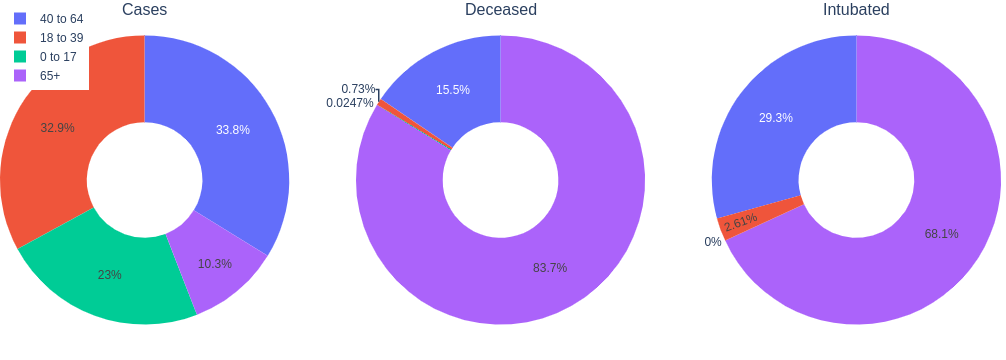

In [133]:
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
    subplot_titles=("Cases", "Deceased", "Intubated")
)

categories = ['cases', 'deceased', 'intubated']

for i,cat in enumerate(categories):
    fig.add_trace(
            go.Pie(
                labels=age_labels,
                values=get_age_group_values_by_category(cat),
                name=cat.capitalize(),
                hole=0.4,
            ),
        row=1, col=i+1
    )

fig.update_layout(
    margin = {'l': 0, 'b': 0, 't': 0, 'r': 0},
    legend = {'x': 0, 'y': 1.05, 'orientation': 'v', 'traceorder': 'normal',}, # 'bgcolor': 'rgba(0,0,0,0)'
)

fig.show()

### Age groups and gender

Stats by age group and gender - Bar chart grouped and stacked (plotly express)

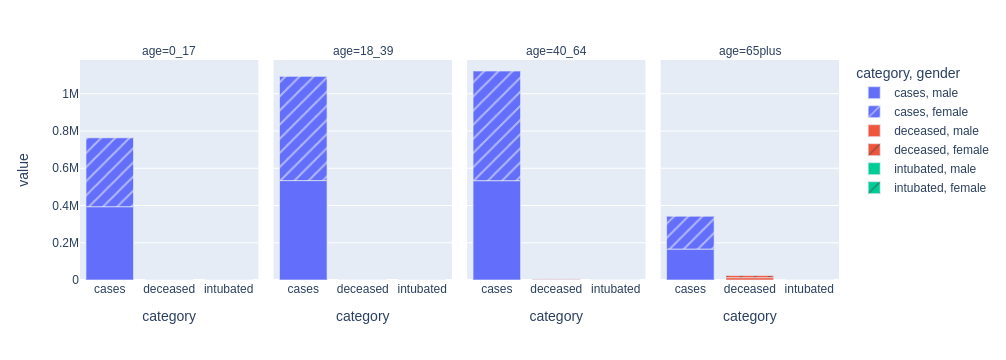

In [134]:
fig = px.bar(df_total_stats, x='category', y='value', color='category', pattern_shape='gender', facet_col='age')
fig.show()

Stats by age group and gender - Bar chart grouped and stacked

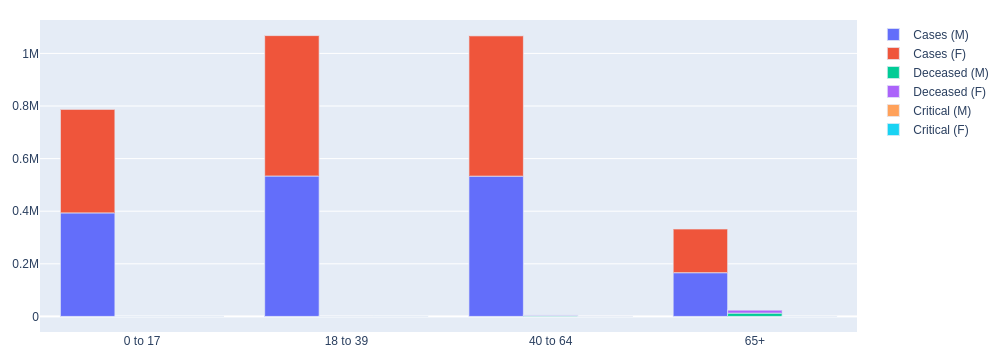

In [135]:
figure={
        'data': [
            {
                'x': age_labels,
                'y': get_age_group_values_by_category_and_gender('cases','male'),
                'type': 'bar',
                'name': 'Cases (M)',
                'offsetgroup':0
            },
            {
                'x': age_labels,
                'y': get_age_group_values_by_category_and_gender('cases','male'),
                'type': 'bar',
                'name': 'Cases (F)',
                'offsetgroup':0,
                'base': get_age_group_values_by_category_and_gender('cases','male'),
            },
            {
                'x': age_labels,
                'y': get_age_group_values_by_category_and_gender('deceased','male'),
                'type': 'bar',
                'name': 'Deceased (M)',
                'offsetgroup':1
            },
            {
                'x': age_labels,
                'y': get_age_group_values_by_category_and_gender('deceased','female'),
                'type': 'bar',
                'name': 'Deceased (F)',
                'offsetgroup':1,
                'base': get_age_group_values_by_category_and_gender('deceased','male'),
            },
            {
                'x': age_labels,
                'y': get_age_group_values_by_category_and_gender('intubated','male'),
                'type': 'bar',
                'name': 'Critical (M)',
                'offsetgroup':2
            },
            {
                'x': age_labels,
                'y': get_age_group_values_by_category_and_gender('intubated','female'),
                'type': 'bar',
                'name': 'Critical (F)',
                'offsetgroup':2,
                'base': get_age_group_values_by_category_and_gender('intubated','male'),
            },
        ],
        'layout': {
            'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
            'yaxis': {'fixedrange': True, 'hoverformat': ','},
            'xaxis': {'fixedrange': True},
            'hovermode': 'x unified'
        }
}
figure=go.Figure(figure)
figure.show()

Stats by age group and gender - Sunburst chart

/home/msiganos/anaconda3/envs/ds/lib/python3.10/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/msiganos/anaconda3/envs/ds/lib/python3.10/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/msiganos/anaconda3/envs/ds/lib/python3.10/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/msiganos/anaconda3/envs/ds/lib/python3.10/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/msiganos/anaconda3/envs/ds/lib/python3.10/site-packages/plotly/express/_core.py:1637: 

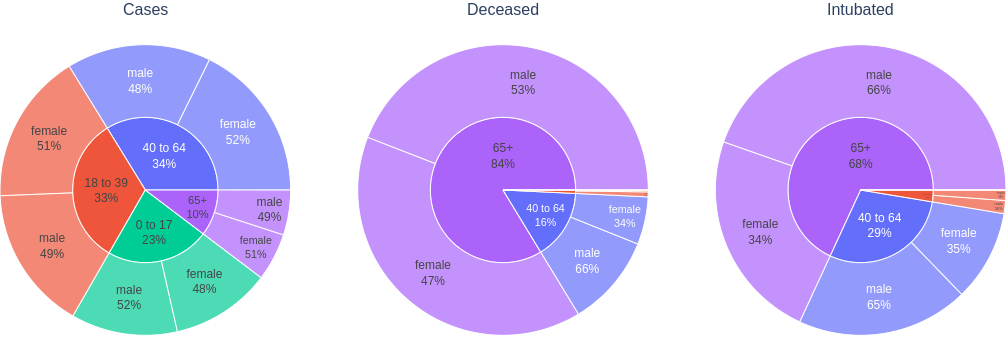

In [136]:
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
    subplot_titles=("Cases", "Deceased", "Intubated")
)

for i,cat in enumerate(df_total_stats['category'].unique()):
    df = df_total_stats[df_total_stats['category']==cat].copy()
    df['age'] = df['age'].str.replace('_', ' to ')
    df['age'] = df['age'].str.replace('plus', '+')
    
    fig_tmp = px.sunburst(df, path=['age', 'gender'], values='value')
    
    fig.add_trace(go.Sunburst(
        ids=fig_tmp.data[0].ids,
        labels= fig_tmp.data[0].labels,
        parents=fig_tmp.data[0].parents,
        values=fig_tmp.data[0].values,
        branchvalues="total",
        name=cat,
        # maxdepth=1
    ), row=1, col=i+1)

fig.update_layout(margin = dict(t=20, l=0, r=0, b=0))
fig.update_traces(
    textinfo="label+percent parent",
    insidetextorientation='horizontal',
)

fig.update_traces(
    hovertext = [f'Fatality: {val:.3f} %' for val in series_fatality_by_age.to_list()],
    selector=dict(name="deceased")
)

fig.show()

Find the corresponding fatality rates for the ids of the sunburst chart

In [137]:
df_fatality_by_age_and_gender = series_fatality_by_age_and_gender.reset_index()
df_fatality_by_age_and_gender['ids'] = df_fatality_by_age_and_gender['age'] + '/' + df_fatality_by_age_and_gender['gender']
df_fatality_by_age_and_gender.set_index('ids', inplace=True)
df_fatality_by_age_and_gender

,age,gender,value
ids,,,
0_17/female,0_17,female,0.001081
0_17/male,0_17,male,0.000762
18_39/female,18_39,female,0.009290
18_39/male,18_39,male,0.029034
40_64/female,40_64,female,0.255405
40_64/male,40_64,male,0.544306
65plus/female,65plus,female,6.364688
65plus/male,65plus,male,7.521272


Deceased by age group and gender with fatality rate - Sunburst chart

/home/msiganos/anaconda3/envs/ds/lib/python3.10/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/msiganos/anaconda3/envs/ds/lib/python3.10/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



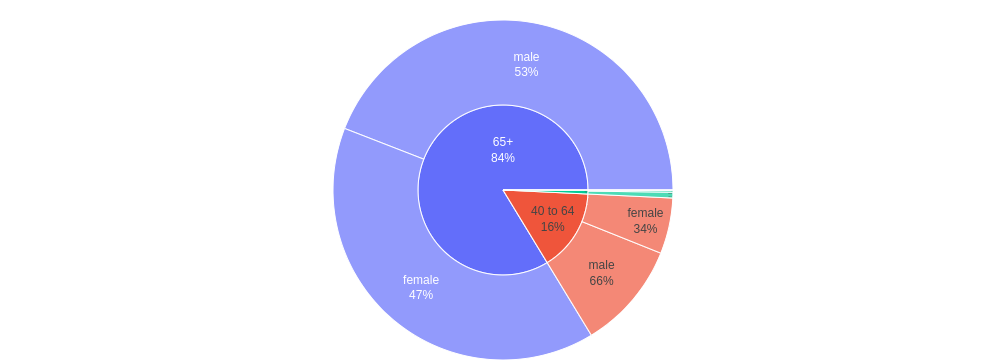

In [138]:
cat = 'deceased'

fig = go.Figure()

df = get_values_for_category(cat)

df['age'].replace({'0_17': '0 to 17', '18_39': '18 to 39', '40_64': '40 to 64', '65plus': '65+'}, inplace=True)

fig_tmp = px.sunburst(df, path=['age', 'gender'], values='value')

fig_ids = [ item.replace(' to ', '_').replace('+', 'plus') for item in fig_tmp.data[0].ids]

sunburst_fatality_values = df_fatality_by_age_and_gender.loc[fig_ids[0:-4]]['value'].round(3).to_list()
sunburst_fatality_values.extend(series_fatality_by_age.loc[fig_ids[-4:]].round(3).to_list())

fig.add_trace(go.Sunburst(
    ids=fig_tmp.data[0].ids,
    labels= fig_tmp.data[0].labels,
    parents=fig_tmp.data[0].parents,
    values=fig_tmp.data[0].values,
    branchvalues="total",
    name=cat,
))

fig.update_layout(
    margin = dict(t=20, l=0, r=0, b=0),
)

fig.update_traces(
    textinfo="label+percent parent",
    insidetextorientation='horizontal',
    hovertext = [f'Fatality: {val:.3f} %' for val in sunburst_fatality_values],
)

fig.show()

### Daily stats

#### Daily cases, deceased and Intubated

Line chart

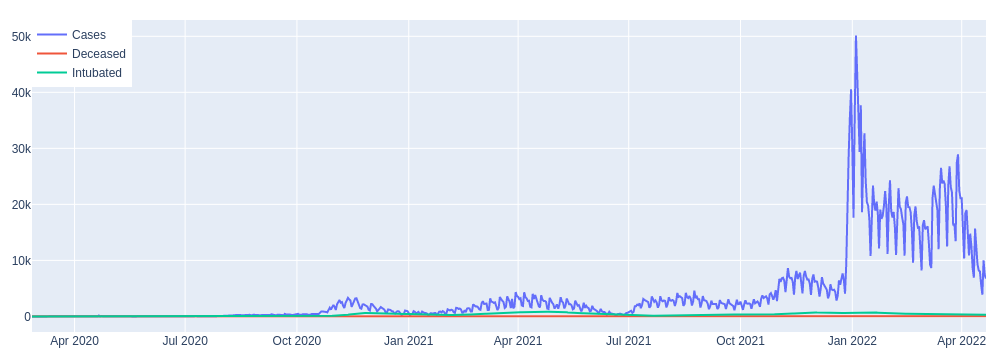

In [139]:
fig = go.Figure()

categories = ['cases', 'deceased', 'intubated']

for cat in categories:
    fig.add_trace(go.Scatter(
        x=df_daily_stats['date'].to_list(),
        y=df_daily_stats[cat].to_list(),
        mode='lines', # +markers
        name=cat.capitalize()
    ))

fig.update_layout({
    'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
    'yaxis': {'fixedrange': True, 'hoverformat': ','},
    # 'xaxis': {'fixedrange': True},
    'hovermode': 'x unified',
    'legend': {'x': 0, 'y': 1}, # 'bgcolor': 'rgba(0,0,0,0)'
})

fig.show()

#### 3-Day cases, deceased and Intubated

Line chart

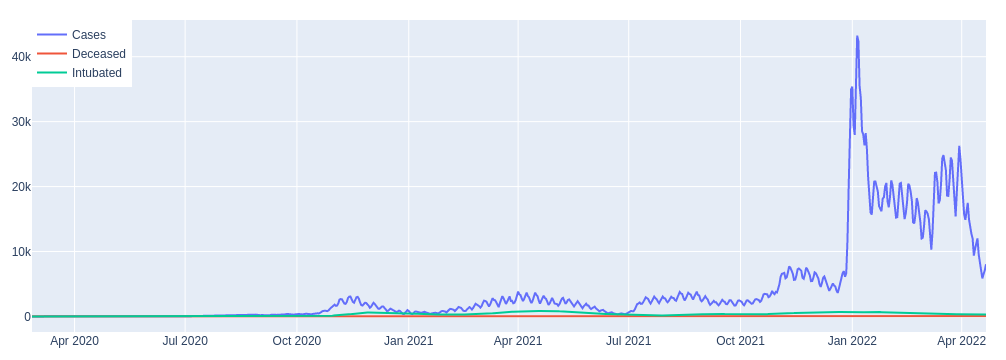

In [140]:
fig = go.Figure()

categories = ['cases', 'deceased', 'intubated']

for cat in categories:
    fig.add_trace(go.Scatter(
        x=df_three_days_stats['date'].to_list(),
        y=df_three_days_stats[cat].to_list(),
        mode='lines', # +markers
        name=cat.capitalize()
    ))

fig.update_layout({
    'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
    'yaxis': {'fixedrange': True, 'hoverformat': ','},
    # 'xaxis': {'fixedrange': True},
    'legend': {'x': 0, 'y': 1}, # 'bgcolor': 'rgba(0,0,0,0)'
    'hovermode': 'x unified'
})

fig.show()

#### Weekly cases, deceased and Intubated

Line chart

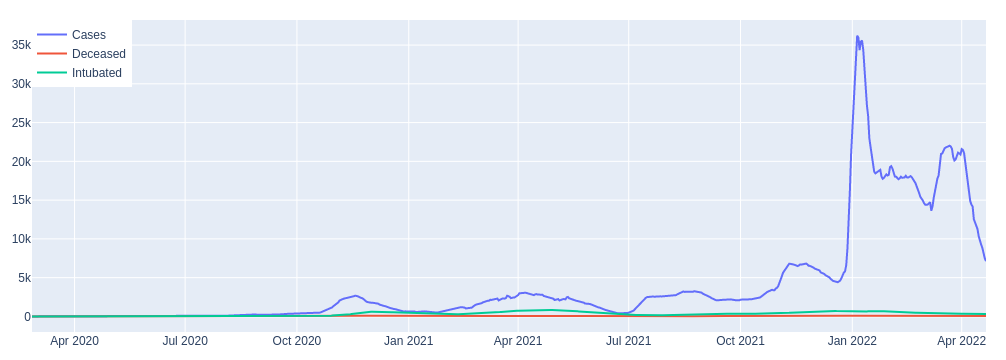

In [141]:
fig = go.Figure()

categories = ['cases', 'deceased', 'intubated']

for cat in categories:
    fig.add_trace(go.Scatter(
        x=df_weekly_stats['date'].to_list(),
        y=df_weekly_stats[cat].to_list(),
        mode='lines', # +markers
        name=cat.capitalize(),
    ))

fig.update_layout({
    'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
    'yaxis': {'fixedrange': True, 'hoverformat': ','},
    # 'xaxis': {'fixedrange': True},
    'legend': {'x': 0, 'y': 1}, # 'bgcolor': 'rgba(0,0,0,0)'
    'hovermode': 'x unified'
})

fig.show()

#### Evolution (running total)

Line chart

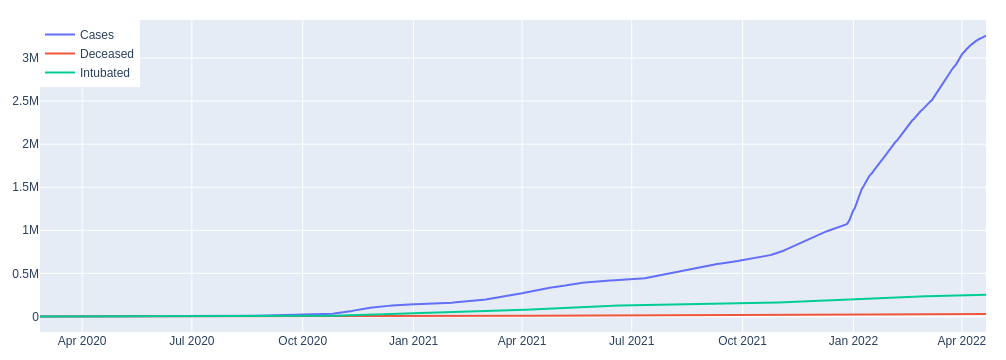

In [142]:
fig = go.Figure()

categories = ['calculated_cases_cumsum', 'calculated_deceased_cumsum', 'calculated_intubated_cumsum']
# categories = ['total_cases', 'total_deceased',]

for cat in categories:
    fig.add_trace(go.Scatter(
        x=df_daily_stats['date'].to_list(),
        y=df_daily_stats[cat].to_list(),
        mode='lines', # +markers
        name=cat.split('_')[1].capitalize(),
        # fill='tonexty',#'tonexty' 'tozeroy'
    ))

fig.update_layout({
    'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
    'yaxis': {'fixedrange': True, 'hoverformat': ','},
    # 'xaxis': {'fixedrange': True},
    'legend': {'x': 0, 'y': 1}, # 'bgcolor': 'rgba(0,0,0,0)'
    'hovermode': 'x unified'
})

fig.show()

#### Daily cases, deceased and fatality rate

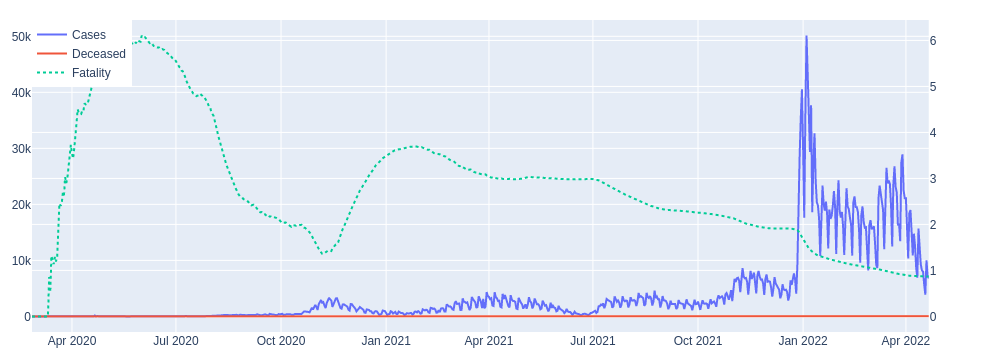

In [143]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

categories = ['cases', 'deceased']

for cat in categories:
    fig.add_trace(
        go.Scatter(
            x=df_daily_stats['date'].to_list(),
            y=df_daily_stats[cat].to_list(),
            mode='lines', # +markers
            name=cat.capitalize()
        ),
        secondary_y=False,
    )

fig.add_trace(
    go.Scatter(
        x=df_daily_stats['date'].to_list(),
        y=df_daily_stats['calculated_fatality'].to_list(),
        mode='lines', # +markers
        # fill='tozeroy',
        # line_color='indigo',#'rgba(131, 90, 241, 0.25)',
        # fillcolor='indigo',#'rgba(131, 90, 241, 0.25)',
        name='Fatality',
        line_dash='dot'
    ),
    secondary_y=True,
)

fig.update_layout({
    'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
    'yaxis': {'fixedrange': True, 'hoverformat': ','},
    'yaxis2': {'fixedrange': True, 'hoverformat': '.2f'},
    # 'xaxis': {'fixedrange': True},
    'hovermode': 'x unified',
    'legend': {'x': 0, 'y': 1}, # 'bgcolor': 'rgba(0,0,0,0)',
})

fig.show()

#### Daily cases, tests and positivity rate

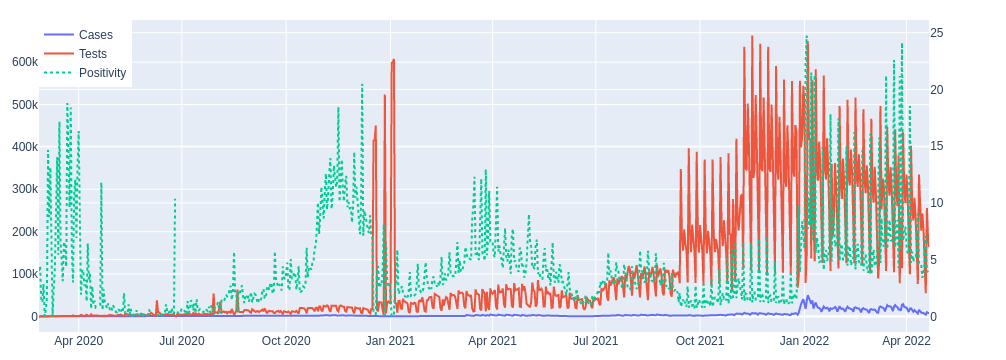

In [144]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
    x=df_daily_stats['date'].to_list(),
    y=df_daily_stats['cases'].to_list(),
    mode='lines', # +markers
    name='Cases'
),secondary_y=False)

fig.add_trace(go.Scatter(
    x=df_daily_stats['date'].to_list(),
    y=df_daily_stats['calculated_tests_total'].to_list(),
    mode='lines', # +markers
    name='Tests'
),secondary_y=False)

fig.add_trace(go.Scatter(
    x=df_daily_stats['date'].to_list(),
    y=df_daily_stats['calculated_positivity'].to_list(),
    mode='lines', # +markers
    name='Positivity',
    line_dash='dot',
),secondary_y=True)

fig.update_layout({
    'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
    'yaxis': {'fixedrange': True, 'hoverformat': ','},
    'yaxis2': {'fixedrange': True, 'hoverformat': '.2f'},
    # 'xaxis': {'fixedrange': True},
    'hovermode': 'x unified',
    'legend': {'x': 0, 'y': 1}, # 'bgcolor': 'rgba(0,0,0,0)'
})

fig.show()

#### Combined

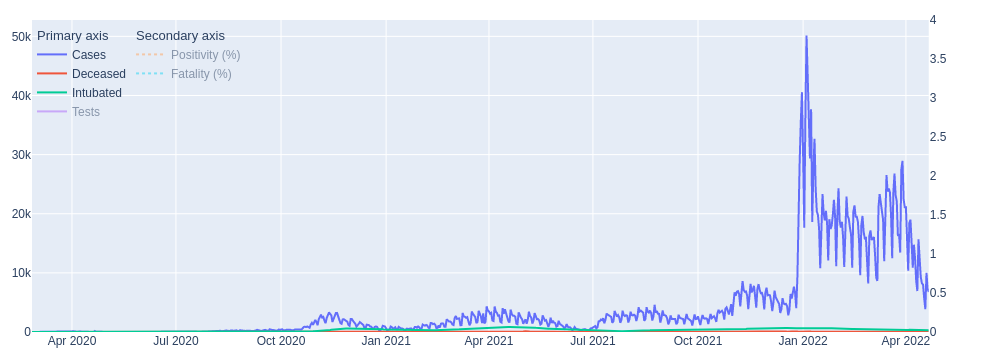

In [146]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

categories = ['cases', 'deceased', 'intubated']
secondary = ['positivity', 'fatality']

for cat in categories:
    fig.add_trace(
        go.Scatter(
            x=df_daily_stats['date'].to_list(),
            y=df_daily_stats[cat].to_list(),
            mode='lines', # +markers
            name=cat.capitalize(),
            legendgroup="group1",
            legendgrouptitle_text="Primary axis",
        ),
        secondary_y=False,
    )

fig.add_trace(
    go.Scatter(
        x=df_daily_stats['date'].to_list(),
        y=df_daily_stats['calculated_tests_total'].to_list(),
        mode='lines', # +markers
        name='Tests',
        visible='legendonly',
        legendgroup="group1",
    ),
    secondary_y=False,
)

for item in secondary:
    fig.add_trace(
        go.Scatter(
            x=df_daily_stats['date'].to_list(),
            y=df_daily_stats['calculated_'+item.lower()].to_list(),
            mode='lines', # +markers
            name=item.capitalize() + " (%)",
            line_dash='dot',
            legendgroup="group2",
            legendgrouptitle_text="Secondary axis",
            visible='legendonly'
        ),
        secondary_y=True,
    )

fig.update_layout({
    'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
    'yaxis': {'fixedrange': True, 'hoverformat': ','},
    'yaxis2': {'fixedrange': True, 'hoverformat': '.2f','showgrid': False },
    # 'xaxis': {'fixedrange': True},
    'hovermode': 'x unified',
    'legend': {'x': 0, 'y': 1, 'groupclick': 'toggleitem', 'orientation': 'h', 'bgcolor': 'rgba(0,0,0,0)'}, # 'bgcolor': 'rgba(0,0,0,0)'
})

fig.update_yaxes(rangemode='tozero')

fig.show()

## Export data

Uncomment to save final (processed) files

In [167]:
# df_daily_stats.to_csv('data/daily_stats.csv', index=False)

In [168]:
# df_three_days_stats.to_csv('data/three_days_stats.csv', index=False)

In [169]:
# df_weekly_stats.to_csv('data/weekly_stats.csv', index=False)

In [170]:
# df_total_stats.to_csv('data/total_stats.csv', index=False)